In [5]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import calplot

In [11]:
# Read the CSV file into a DataFrame
AQI_21_df = pd.read_csv("/Users/emilyschner//Downloads/daily_aqi_by_county_2021.csv")

# Display the first few rows of the DataFrame
AQI_21_df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-16,21,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-19,52,Moderate,PM2.5,01-003-0010,1


In [12]:
state_data=AQI_21_df.groupby("State Name").get_group("New Jersey")
state_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
171410,New Jersey,Atlantic,34,1,2021-01-01,27,Good,Ozone,34-001-0006,1
171411,New Jersey,Atlantic,34,1,2021-01-02,20,Good,Ozone,34-001-0006,1
171412,New Jersey,Atlantic,34,1,2021-01-03,25,Good,Ozone,34-001-0006,1
171413,New Jersey,Atlantic,34,1,2021-01-04,19,Good,PM2.5,34-001-0006,1
171414,New Jersey,Atlantic,34,1,2021-01-05,21,Good,PM2.5,34-001-0006,1


In [13]:
county_data=state_data.groupby("county Name")
county_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
171410,New Jersey,Atlantic,34,1,2021-01-01,27,Good,Ozone,34-001-0006,1
171411,New Jersey,Atlantic,34,1,2021-01-02,20,Good,Ozone,34-001-0006,1
171412,New Jersey,Atlantic,34,1,2021-01-03,25,Good,Ozone,34-001-0006,1
171413,New Jersey,Atlantic,34,1,2021-01-04,19,Good,PM2.5,34-001-0006,1
171414,New Jersey,Atlantic,34,1,2021-01-05,21,Good,PM2.5,34-001-0006,1
...,...,...,...,...,...,...,...,...,...,...
176587,New Jersey,Warren,34,41,2021-01-01,34,Good,PM2.5,34-041-0007,1
176588,New Jersey,Warren,34,41,2021-01-02,21,Good,Ozone,34-041-0007,1
176589,New Jersey,Warren,34,41,2021-01-03,24,Good,PM2.5,34-041-0007,1
176590,New Jersey,Warren,34,41,2021-01-04,29,Good,PM2.5,34-041-0007,1


In [14]:
grouped_data = state_data.groupby(['Defining Parameter', 'county Name'])
grouped_data.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
171410,New Jersey,Atlantic,34,1,2021-01-01,27,Good,Ozone,34-001-0006,1
171411,New Jersey,Atlantic,34,1,2021-01-02,20,Good,Ozone,34-001-0006,1
171412,New Jersey,Atlantic,34,1,2021-01-03,25,Good,Ozone,34-001-0006,1
171413,New Jersey,Atlantic,34,1,2021-01-04,19,Good,PM2.5,34-001-0006,1
171414,New Jersey,Atlantic,34,1,2021-01-05,21,Good,PM2.5,34-001-0006,1
...,...,...,...,...,...,...,...,...,...,...
176621,New Jersey,Warren,34,41,2021-02-04,40,Good,NO2,34-041-0007,1
176623,New Jersey,Warren,34,41,2021-02-06,38,Good,NO2,34-041-0007,1
176625,New Jersey,Warren,34,41,2021-02-08,41,Good,NO2,34-041-0007,1
176634,New Jersey,Warren,34,41,2021-02-17,36,Good,NO2,34-041-0007,1


In [18]:
# Group the DataFrame by the 'County' column and calculate the mean of the 'AQI' column
average_aqi_by_county = grouped_data.groupby('County')['AQI'].mean()
average_aqi_by_county

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

In [19]:
grouped_mean=county_data["AQI"].mean()
grouped_mean

county Name
Atlantic      36.997238
Bergen        41.975342
Camden        45.402740
Cumberland    38.384615
Essex         41.849315
Gloucester    39.632997
Hudson        42.490411
Hunterdon     40.126374
Mercer        45.419178
Middlesex     42.010989
Monmouth      39.674510
Morris        37.066116
Ocean         39.577031
Passaic       36.597701
Union         43.890411
Warren        38.446927
Name: AQI, dtype: float64

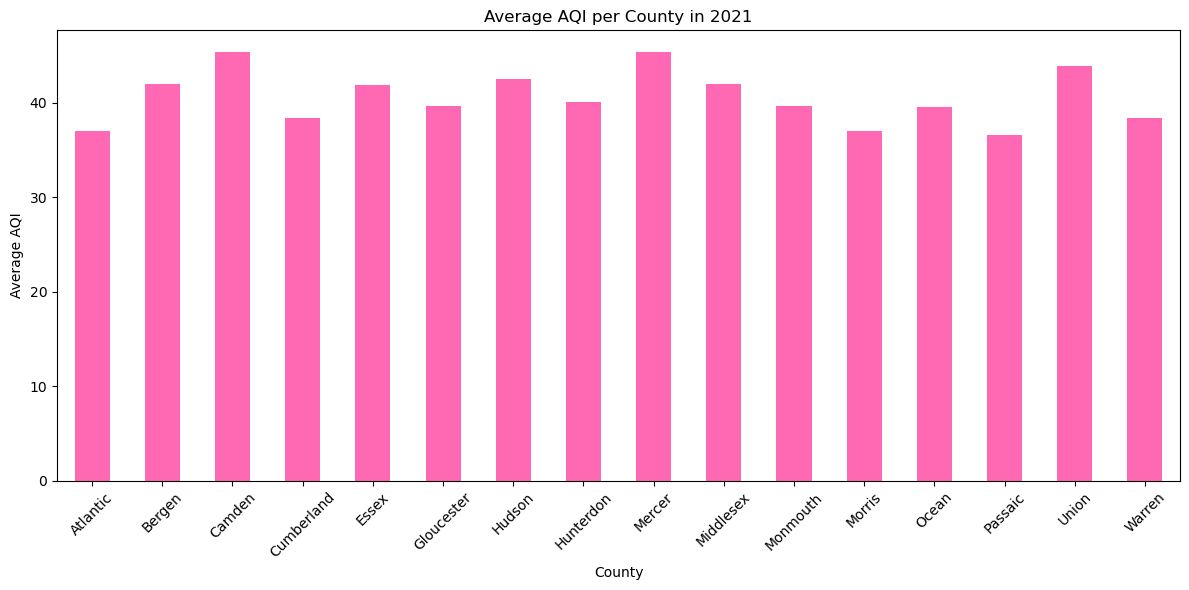

In [21]:
# Create the bar graph
plt.figure(figsize=(12, 6))
grouped_mean.plot(kind='bar', color='hotpink')
plt.xlabel('County')
plt.ylabel('Average AQI')
plt.title('Average AQI per County in 2021')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Display the bar graph
plt.show()

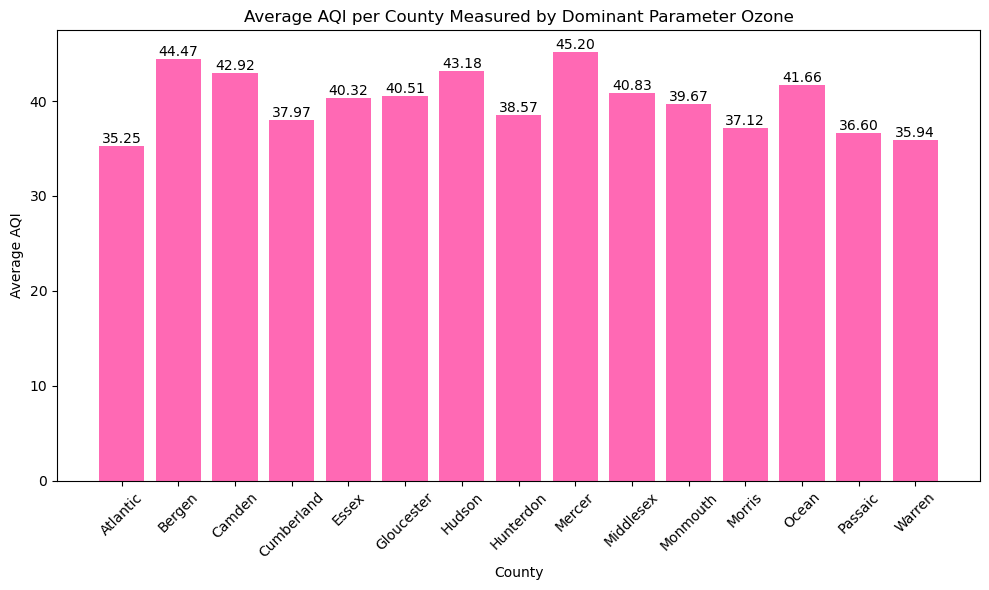

In [12]:
grouped_mean_ozone = grouped_mean[grouped_mean.index.get_level_values(0) == 'Ozone']


fig, ax = plt.subplots(figsize=(10, 6))


bars = ax.bar(range(len(grouped_mean_ozone)), grouped_mean_ozone, color="hotpink", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter Ozone")
ax.set_xticks(range(len(grouped_mean_ozone)))
ax.set_xticklabels(grouped_mean_ozone.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', 
            ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

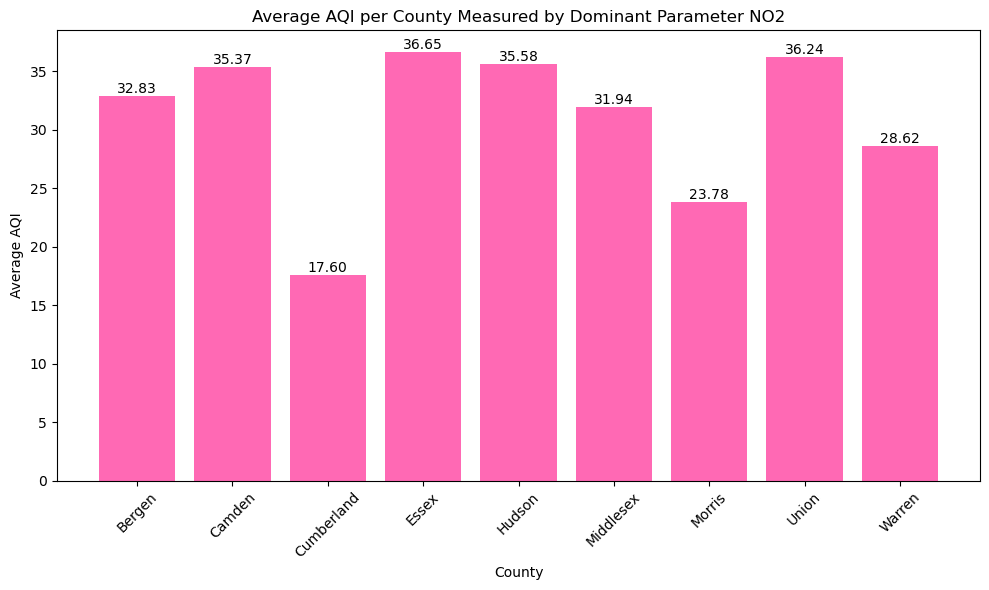

In [19]:
grouped_mean_no2 = grouped_mean[grouped_mean.index.get_level_values(0) == 'NO2']


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean_no2)), grouped_mean_no2, color="hotpink", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter NO2")
ax.set_xticks(range(len(grouped_mean_no2)))
ax.set_xticklabels(grouped_mean_no2.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

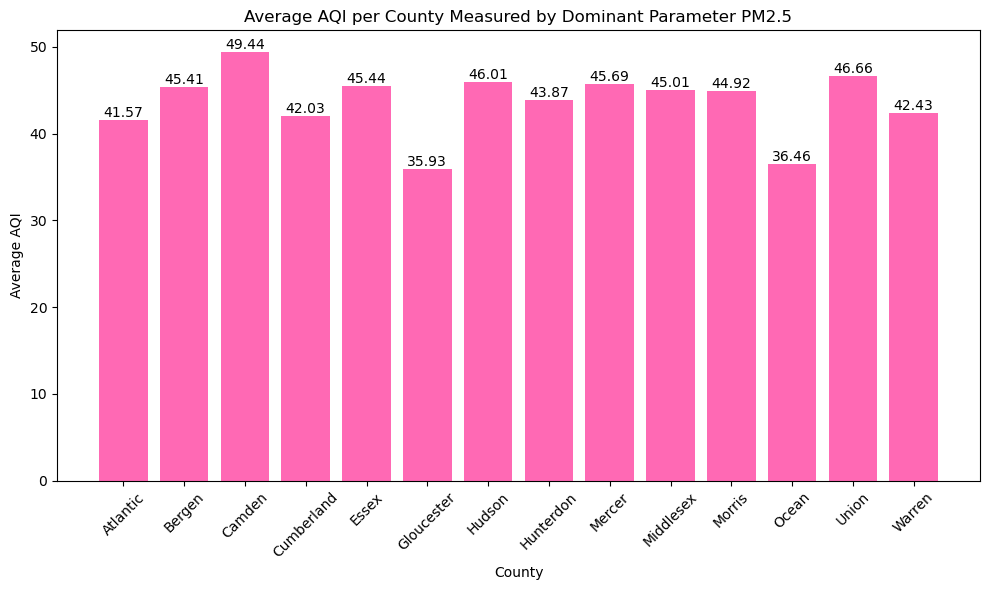

In [17]:
grouped_mean_pm = grouped_mean[grouped_mean.index.get_level_values(0) == 'PM2.5']


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(range(len(grouped_mean_pm)), grouped_mean_pm, color="hotpink", align="center")


ax.set_xlabel("County")
ax.set_ylabel("Average AQI")
ax.set_title("Average AQI per County Measured by Dominant Parameter PM2.5")
ax.set_xticks(range(len(grouped_mean_pm)))
ax.set_xticklabels(grouped_mean_pm.index.get_level_values(1), rotation=90)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}',  # Display the height with two decimal places
            ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

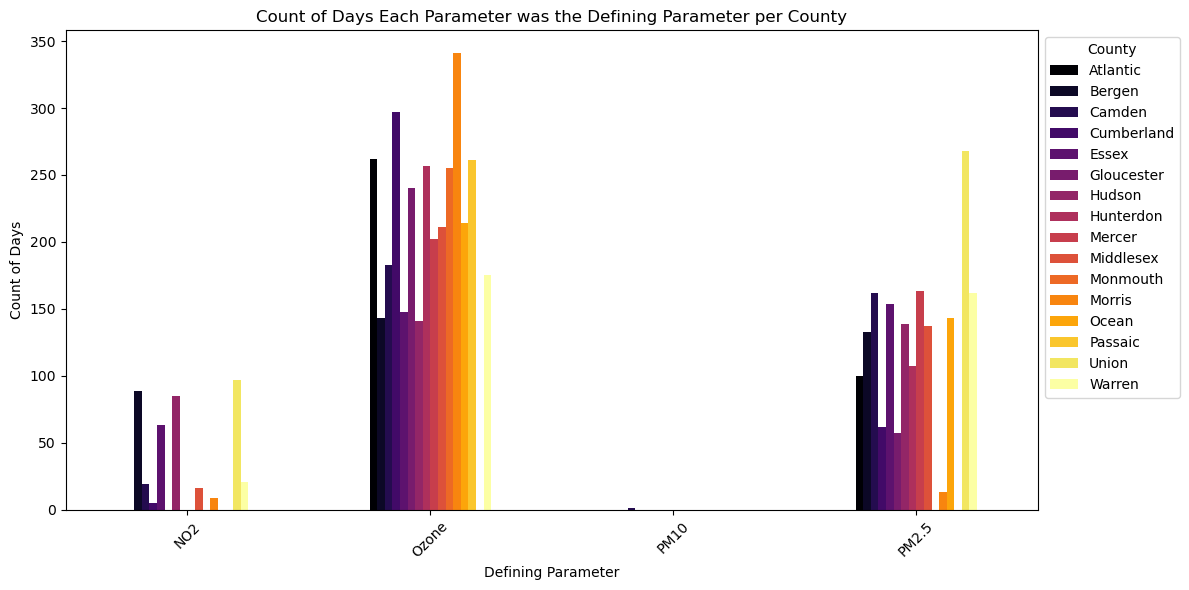

In [16]:
# Group by the defining parameter and county, then count the days each parameter was the defining parameter
count_days_per_parameter = state_data.groupby(['Defining Parameter', 'county Name']).size().unstack()

# Create the bar graph
count_days_per_parameter.plot(kind='bar', figsize=(12, 6), colormap='inferno')
plt.xlabel('Defining Parameter')
plt.ylabel('Count of Days')
plt.title('Count of Days Each Parameter was the Defining Parameter per County')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='County', bbox_to_anchor=(1, 1))  # Add legend outside the plot
plt.tight_layout()
plt.xticks(rotation=45)
# Display the bar graph
plt.show()